<a href="https://colab.research.google.com/github/mohamed0998/time-series-analysis/blob/master/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import the packages

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()
from google.colab import files

uploaded = files.upload()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving Index2018.csv to Index2018.csv


## load the data

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')


## Removing Surplus Data

In [4]:
df_comp['market_value']=df_comp.spx

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## white noise`

In [34]:
wn = np.random.normal(loc=df.market_value.mean(),scale=df.market_value.std(), size=len(df))
df['wn']=wn
df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,market_value,wn,rw
count,5021.000000,5021.000000,5021.000000
mean,1091.651926,1098.528360,1269.944293
std,292.559287,290.897151,444.216793
min,438.920000,73.060362,585.483034
25%,914.620000,900.578909,931.550429
50%,1144.650000,1102.408122,1156.363045
75%,1316.280729,1297.932930,1488.362029
max,1570.252238,2199.153296,2715.508720


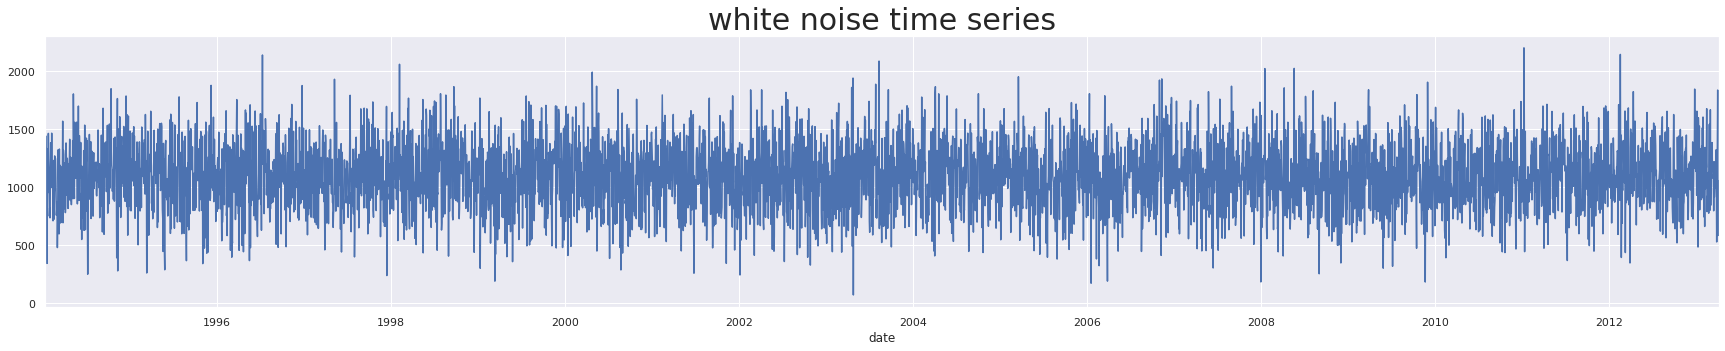

In [35]:
df.wn.plot(figsize=(30,5))
plt.title('white noise time series', size=30)
plt.show()



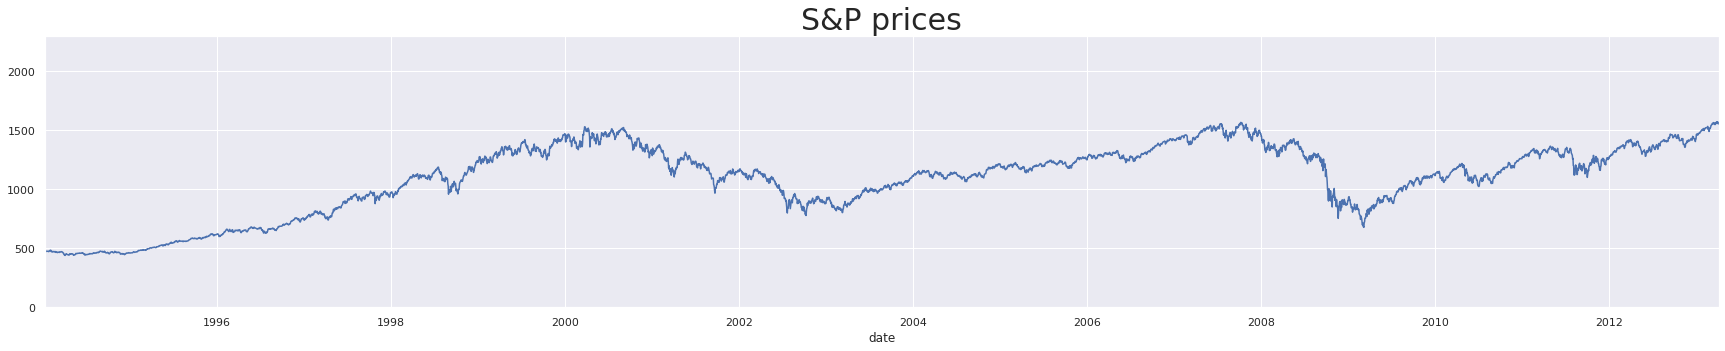

In [36]:
df.market_value.plot(figsize=(30,5))
plt.title("S&P prices",size=30)
plt.ylim(0,2300)
plt.show()


## Random Walk

In [37]:
uploaded = files.upload()

Saving RandWalk.csv to RandWalk (1).csv


In [38]:
rw=pd.read_csv('RandWalk.csv')
rw.date=pd.to_datetime(rw.date, dayfirst= True)
rw.set_index('date', inplace=True)
rw=rw.asfreq('b')
rw.head()
rw.describe()


,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [39]:
df['rw'] = rw.price
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,market_value,wn,rw
date,,,
1994-01-07,469.90,1063.319401,1122.139662
1994-01-10,475.27,1194.336587,1080.347860
1994-01-11,474.13,649.420332,1082.095245
1994-01-12,474.17,1441.811383,1083.639265
1994-01-13,472.47,1145.474881,1067.146255


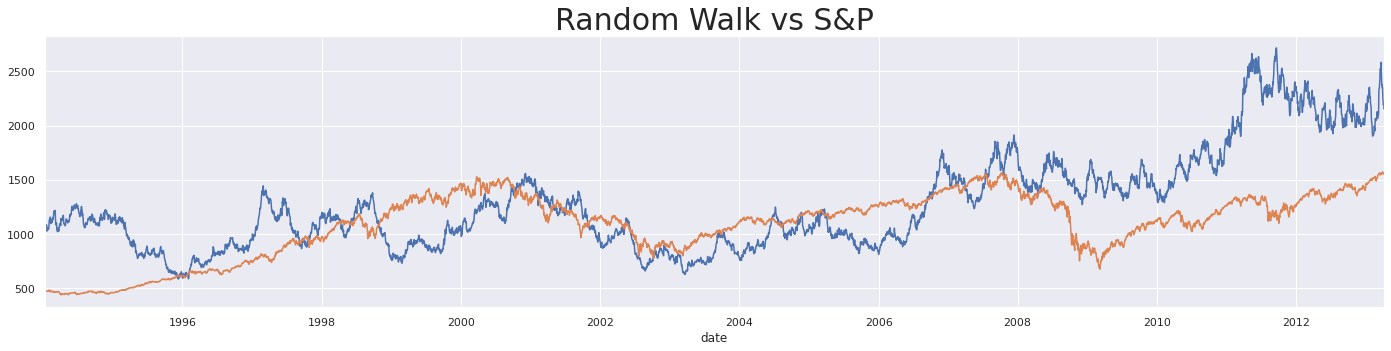

In [40]:
df.rw.plot(figsize=(24,5))
df.market_value.plot()
plt.title("Random Walk vs S&P",size=30)
plt.show()

## Stationarity

In [41]:
sts.adfuller(df.market_value)

(-1.7369847452352454,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39904.880607487445)

In [42]:
sts.adfuller(df.wn)

(-72.37251500111451,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '10%': -2.5670765656497516,
  '5%': -2.8621159253018247},
 70757.33012270794)

In [43]:
sts.adfuller(df.rw)

(-1.3286073927689717,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '10%': -2.567078038881065,
  '5%': -2.8621186927706463},
 46299.333497595144)